In [14]:
import pandas as pd
import string
import re
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from nltk.corpus import stopwords
import nltk

In [15]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Twisha
[nltk_data]     Bose\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [16]:
file_path = 'C:\\Users\\Twisha Bose\\Documents\\CodSoft Internship\\spam.csv' 
spam_data = pd.read_csv(file_path, encoding='latin-1')

In [17]:
print("Initial Dataset Overview:")
print(spam_data.head())

Initial Dataset Overview:
     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  


In [18]:
spam_data = spam_data[['v1', 'v2']]
spam_data.columns = ['Label', 'Message']

In [19]:
print("\nMissing values:")
print(spam_data.isnull().sum())


Missing values:
Label      0
Message    0
dtype: int64


In [20]:
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(f'[{string.punctuation}]', '', text)  # Remove punctuation
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = ' '.join([word for word in text.split() if word not in stopwords.words('english')])  # Remove stopwords
    return text

In [21]:
spam_data['Message'] = spam_data['Message'].apply(preprocess_text)

In [22]:
print("\nPreprocessed Messages:")
print(spam_data.head())


Preprocessed Messages:
  Label                                            Message
0   ham  go jurong point crazy available bugis n great ...
1   ham                            ok lar joking wif u oni
2  spam  free entry wkly comp win fa cup final tkts st ...
3   ham                u dun say early hor u c already say
4   ham        nah dont think goes usf lives around though


In [23]:
tfidf = TfidfVectorizer(max_features=3000)  
X = tfidf.fit_transform(spam_data['Message']).toarray()

In [24]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(spam_data['Label'])

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
svm_model = SVC(kernel='linear', random_state=42)  
svm_model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [27]:
y_pred = svm_model.predict(X_test)

In [28]:
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy:.4f}")


Model Accuracy: 0.9785


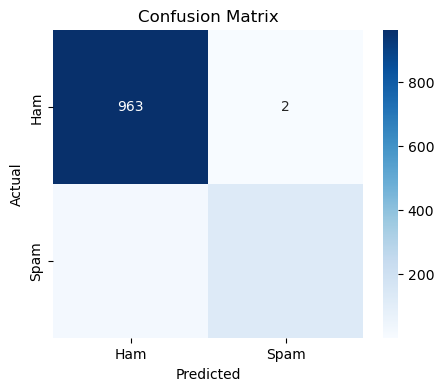

In [29]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [30]:
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.98      0.85      0.91       150

    accuracy                           0.98      1115
   macro avg       0.98      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115

